<a href="https://colab.research.google.com/github/Nattakonjpg/BasicProg_DataViz65/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analytics

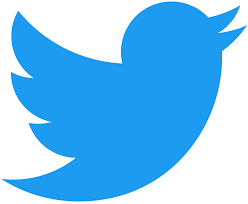

## Due Date: Sunday, September 25
<br>
<span style="color:red">NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!</span>

## List team members:

1. นายธนภัทร           โสภณ           633020444-1
2. นายณัฐกรณ์           พวงแก้ว        633021015-9
3. นางสาวพัชรีภรณ์     ตากวัก        633021019-1
4. นางสาวพิมพกานต์    ภูพานทอง  633021021-4
5. นางสาวศศิวิมล          วิลาชัย       633021023-0
6. นางสาวสุจิรา          มันหาท้าว      633021025-6

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

In [ ]:
# Uncomment to install library if you have not done so
!pip3 install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load these libraries
import json
import pprint
import pandas as pd
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Permit reading data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problem 1: Working with Twitter Data and JSON file

We are working with a Twitter dataset in JSON format from `thailand_tweets.txt`.<br>
The tweets were scraped using "Thailand" keyword on August 31, 2022.<br>
We are going to examine the dataset and retrieve information from the JSON file.

#### Read JSON file

In [ ]:
# Specify the corresponding directory in your drive
file = open('/content/drive/My Drive/dataviz_2022/Warehouse/thailand_tweets.txt','r')
foo = file.read() 
data = json.loads(foo)
file.close()

In [ ]:
# inspect the file
print(data)

{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider", "cr

In [ ]:
# Convert the data object into dict if it is not in dict format
# Note: json.loads takes a string as input and 
#        returns a dictionary as output, 
#        while json.dumps take a dictionary as input and 
#        returns a string as output.
data_json = data
print("The data object type is",type(data_json))
while not isinstance(data_json, dict):
    # convert the data object into dict
    data_json = json.loads(data_json)
    print("After converting, the data object type is",type(data_json))

The data object type is <class 'str'>
After converting, the data object type is <class 'dict'>


#### Pretty print json/dict object

In [ ]:
pprint.pprint(data_json)

{'1564761905410875392': {'content': 'Tinggal cari duitnya aja ini mah kalo di '
                                    'Thailand bisa pake Qris',
                         'hashtags': [],
                         'images': [],
                         'is_retweet': False,
                         'likes': 0,
                         'link': '',
                         'mentions': [],
                         'name': '',
                         'posted_time': '2022-08-30T23:48:04+00:00',
                         'profile_picture': 'https://twitter.com/moanfIeur/photo',
                         'replies': 0,
                         'retweets': 0,
                         'tweet_id': '1564761905410875392',
                         'tweet_url': 'https://twitter.com/moanfIeur/status/1564761905410875392',
                         'username': 'moanfIeur',
                         'videos': []},
 '1564761944061382656': {'content': 'Padahal berharap pertama lawan Thailand '
                     

In fact, `pandas` has `pandas.read_json(<file_dir>) function to read json file into dataframe

In [ ]:
pd.read_json(StringIO(data), orient='index').head()

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,


As we create a data dict, we can also read our data dict into a pandas dataframe

In [ ]:
pd.DataFrame.from_dict(data_json)

,1564764893038882816,1564764866598080513,1564764845685280772,1564764710804897792,1564764468277612549,1564764445825458181,1564764361742110720,1564764274098323456,1564764028014313472,1564763907700531202,...,1564763292354355200,1564763185244426240,1564763141589897217,1564763050477244417,1564762341324992513,1564762335192940544,1564762170277052418,1564762027507458049,1564761944061382656,1564761905410875392
tweet_id,1564764893038882816,1564764866598080513,1564764845685280772,1564764710804897792,1564764468277612549,1564764445825458181,1564764361742110720,1564764274098323456,1564764028014313472,1564763907700531202,...,1564763292354355200,1564763185244426240,1564763141589897217,1564763050477244417,1564762341324992513,1564762335192940544,1564762170277052418,1564762027507458049,1564761944061382656,1564761905410875392
username,matthunter,DavSmithVP,DailyPattaya,Bryan62766077,Megan_and_Grrr,OhmPawatInter,nato_tonyo11,ThThitikarn61,Livetradingnews,DiscoverSoc,...,LDN327,Jay_beebee,Iovelydoll,jaemmrchv,Zeepruk_jfc,NFTLadyEve,AntzAntz1,taraxacumyx,IrfanHazard10,moanfIeur
name,MATT HUNTΞR,DavSmith / Virtual Photography,The Pattaya Daily,Bryan,Megan,OhmPawat International,nutri(BUSY SI ENGR.)| SoliD,thiti,Knightly News,Discover Society,...,LDN327,Jay Bee,,wonyoungiii | surprise cutie,ZeePruk_JapanFC（Rest）,NFTeVe,palito..showcase,Dandelion,Irfan Rapiansyah,
profile_picture,https://twitter.com/matthunter/photo,https://twitter.com/DavSmithVP/photo,https://twitter.com/DailyPattaya/photo,https://twitter.com/Bryan62766077/photo,https://twitter.com/Megan_and_Grrr/photo,https://twitter.com/OhmPawatInter/photo,https://twitter.com/nato_tonyo11/photo,https://twitter.com/ThThitikarn61/photo,https://twitter.com/Livetradingnews/photo,https://twitter.com/DiscoverSoc/photo,...,https://twitter.com/LDN327/photo,https://twitter.com/Jay_beebee/photo,https://twitter.com/Iovelydoll/photo,https://twitter.com/jaemmrchv/photo,https://twitter.com/Zeepruk_jfc/photo,https://twitter.com/NFTLadyEve/photo,https://twitter.com/AntzAntz1/photo,https://twitter.com/taraxacumyx/photo,https://twitter.com/IrfanHazard10/photo,https://twitter.com/moanfIeur/photo
replies,2,0,0,1,0,0,0,0,0,0,...,1,1,0,0,2,1,0,1,0,0
retweets,1,0,0,0,0,99,2,0,2,1,...,7,7,0,1,54,0,0,0,0,0
likes,7,2,0,1,0,143,18,0,3,0,...,5,7,3,0,32,1,0,0,0,0
is_retweet,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
posted_time,2022-08-30T23:59:57+00:00,2022-08-30T23:59:50+00:00,2022-08-30T23:59:45+00:00,2022-08-30T23:59:13+00:00,2022-08-30T23:58:15+00:00,2022-08-30T23:58:10+00:00,2022-08-30T23:57:50+00:00,2022-08-30T23:57:29+00:00,2022-08-30T23:56:30+00:00,2022-08-30T23:56:02+00:00,...,2022-08-30T23:53:35+00:00,2022-08-30T23:53:09+00:00,2022-08-30T23:52:59+00:00,2022-08-30T23:52:37+00:00,2022-08-30T23:49:48+00:00,2022-08-30T23:49:47+00:00,2022-08-30T23:49:07+00:00,2022-08-30T23:48:33+00:00,2022-08-30T23:48:13+00:00,2022-08-30T23:48:04+00:00
content,"Thanks for asking! Yes, we will support shippi...",Tomb Raider Underworld | Thailand \n#VirtualPh...,The latest The Pattaya Daily! http://thepattay...,"You can live some places for next to nothing, ...","ALIEN HOUSE is a story of love, hope and alien...",Trend twitter update \n\nTop Twitter influence...,Good morning world! And goodmorning to you to...,Listening to #faraway the title track of #theo...,With the recent news of the SCB X-Bitkub deal ...,#ICYMI On the Frontline. Crude Power in Thail...,...,- please engage\n\nELLE Thailand \n https://i...,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...",we need more ten vlogs in thailand...a girl ca...,@NaEMwi\n @jaemwinner\n @JAEMIN_THAILAND,Can you help me?\n\ntracking number\nFMP200001...,how about Friday at 11 am? that way it will b...,เป๊ก ปาล์มมี่ | Disney+ Hotstar Thailand https...,@blueeyellowww\n Yuk nabung buat ke Thailand wkwk,Padahal berharap pertama lawan Thailand atau F...,Tinggal cari duitnya aja ini mah kalo di Thail...


In [ ]:
tweets_1_1 = pd.read_json(StringIO(data), orient='index')
tweets_1_1.reset_index()

,index,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link
0,2019-08-02 16:54:53.038882816,1564764893038882816,matthunter,MATT HUNTΞR,https://twitter.com/matthunter/photo,2,1,7,False,2022-08-30 23:59:57+00:00,"Thanks for asking! Yes, we will support shippi...",[],[],[],[],https://twitter.com/matthunter/status/15647648...,
1,2019-08-02 16:54:26.598080513,1564764866598080512,DavSmithVP,DavSmith / Virtual Photography,https://twitter.com/DavSmithVP/photo,0,0,2,False,2022-08-30 23:59:50+00:00,Tomb Raider Underworld | Thailand \n#VirtualPh...,[VirtualPhotography],"[tombraider, crystaldynamics]",[https://pbs.twimg.com/media/FbcpF-FXkAIlqTS?f...,[],https://twitter.com/DavSmithVP/status/15647648...,
2,2019-08-02 16:54:05.685280772,1564764845685280768,DailyPattaya,The Pattaya Daily,https://twitter.com/DailyPattaya/photo,0,0,0,False,2022-08-30 23:59:45+00:00,The latest The Pattaya Daily! http://thepattay...,"[thailand, pattaya]","[PopeKael, ASEANNOWTH]",[],[],https://twitter.com/DailyPattaya/status/156476...,
3,2019-08-02 16:51:50.804897792,1564764710804897792,Bryan62766077,Bryan,https://twitter.com/Bryan62766077/photo,1,0,1,False,2022-08-30 23:59:13+00:00,"You can live some places for next to nothing, ...",[],[],[],[],https://twitter.com/Bryan62766077/status/15647...,
4,2019-08-02 16:47:48.277612549,1564764468277612544,Megan_and_Grrr,Megan,https://twitter.com/Megan_and_Grrr/photo,0,0,0,False,2022-08-30 23:58:15+00:00,"ALIEN HOUSE is a story of love, hope and alien...","[fantasy, extraterrestrial]",[],[https://pbs.twimg.com/media/Fbco_bSXEAMcDOZ?f...,[],https://twitter.com/Megan_and_Grrr/status/1564...,
5,2019-08-02 16:47:25.825458181,1564764445825458176,OhmPawatInter,OhmPawat International,https://twitter.com/OhmPawatInter/photo,0,99,143,False,2022-08-30 23:58:10+00:00,Trend twitter update \n\nTop Twitter influence...,"[4, ohmpawat, ย]",[ohmpawatt],[https://pbs.twimg.com/media/Fbco99jWIAEd3Oe?f...,[],https://twitter.com/OhmPawatInter/status/15647...,
6,2019-08-02 16:46:01.742110720,1564764361742110720,nato_tonyo11,nutri(BUSY SI ENGR.)| SoliD,https://twitter.com/nato_tonyo11/photo,0,2,18,False,2022-08-30 23:57:50+00:00,Good morning world! And goodmorning to you to...,[DonnyPangilinan],[],[],[],https://twitter.com/nato_tonyo11/status/156476...,
7,2019-08-02 16:44:34.098323456,1564764274098323456,ThThitikarn61,thiti,https://twitter.com/ThThitikarn61/photo,0,0,0,False,2022-08-30 23:57:29+00:00,Listening to #faraway the title track of #theo...,"[faraway, theotherside, MarkTuan]",[marktuan],[],[],https://twitter.com/ThThitikarn61/status/15647...,
8,2019-08-02 16:40:28.014313472,1564764028014313472,Livetradingnews,Knightly News,https://twitter.com/Livetradingnews/photo,0,2,3,False,2022-08-30 23:56:30+00:00,With the recent news of the SCB X-Bitkub deal ...,[],[],[],[],https://twitter.com/Livetradingnews/status/156...,
9,2019-08-02 16:38:27.700531202,1564763907700531200,DiscoverSoc,Discover Society,https://twitter.com/DiscoverSoc/photo,0,1,0,False,2022-08-30 23:56:02+00:00,#ICYMI On the Frontline. Crude Power in Thail...,[ICYMI],[],[],[],https://twitter.com/DiscoverSoc/status/1564763...,https://t.co/OYQzv4BSm9


In [ ]:
tweets_1_2 = pd.DataFrame.from_dict(data_json)
tweets_1_2.reset_index()

,index,1564764893038882816,1564764866598080513,1564764845685280772,1564764710804897792,1564764468277612549,1564764445825458181,1564764361742110720,1564764274098323456,1564764028014313472,...,1564763292354355200,1564763185244426240,1564763141589897217,1564763050477244417,1564762341324992513,1564762335192940544,1564762170277052418,1564762027507458049,1564761944061382656,1564761905410875392
0,tweet_id,1564764893038882816,1564764866598080513,1564764845685280772,1564764710804897792,1564764468277612549,1564764445825458181,1564764361742110720,1564764274098323456,1564764028014313472,...,1564763292354355200,1564763185244426240,1564763141589897217,1564763050477244417,1564762341324992513,1564762335192940544,1564762170277052418,1564762027507458049,1564761944061382656,1564761905410875392
1,username,matthunter,DavSmithVP,DailyPattaya,Bryan62766077,Megan_and_Grrr,OhmPawatInter,nato_tonyo11,ThThitikarn61,Livetradingnews,...,LDN327,Jay_beebee,Iovelydoll,jaemmrchv,Zeepruk_jfc,NFTLadyEve,AntzAntz1,taraxacumyx,IrfanHazard10,moanfIeur
2,name,MATT HUNTΞR,DavSmith / Virtual Photography,The Pattaya Daily,Bryan,Megan,OhmPawat International,nutri(BUSY SI ENGR.)| SoliD,thiti,Knightly News,...,LDN327,Jay Bee,,wonyoungiii | surprise cutie,ZeePruk_JapanFC（Rest）,NFTeVe,palito..showcase,Dandelion,Irfan Rapiansyah,
3,profile_picture,https://twitter.com/matthunter/photo,https://twitter.com/DavSmithVP/photo,https://twitter.com/DailyPattaya/photo,https://twitter.com/Bryan62766077/photo,https://twitter.com/Megan_and_Grrr/photo,https://twitter.com/OhmPawatInter/photo,https://twitter.com/nato_tonyo11/photo,https://twitter.com/ThThitikarn61/photo,https://twitter.com/Livetradingnews/photo,...,https://twitter.com/LDN327/photo,https://twitter.com/Jay_beebee/photo,https://twitter.com/Iovelydoll/photo,https://twitter.com/jaemmrchv/photo,https://twitter.com/Zeepruk_jfc/photo,https://twitter.com/NFTLadyEve/photo,https://twitter.com/AntzAntz1/photo,https://twitter.com/taraxacumyx/photo,https://twitter.com/IrfanHazard10/photo,https://twitter.com/moanfIeur/photo
4,replies,2,0,0,1,0,0,0,0,0,...,1,1,0,0,2,1,0,1,0,0
5,retweets,1,0,0,0,0,99,2,0,2,...,7,7,0,1,54,0,0,0,0,0
6,likes,7,2,0,1,0,143,18,0,3,...,5,7,3,0,32,1,0,0,0,0
7,is_retweet,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
8,posted_time,2022-08-30T23:59:57+00:00,2022-08-30T23:59:50+00:00,2022-08-30T23:59:45+00:00,2022-08-30T23:59:13+00:00,2022-08-30T23:58:15+00:00,2022-08-30T23:58:10+00:00,2022-08-30T23:57:50+00:00,2022-08-30T23:57:29+00:00,2022-08-30T23:56:30+00:00,...,2022-08-30T23:53:35+00:00,2022-08-30T23:53:09+00:00,2022-08-30T23:52:59+00:00,2022-08-30T23:52:37+00:00,2022-08-30T23:49:48+00:00,2022-08-30T23:49:47+00:00,2022-08-30T23:49:07+00:00,2022-08-30T23:48:33+00:00,2022-08-30T23:48:13+00:00,2022-08-30T23:48:04+00:00
9,content,"Thanks for asking! Yes, we will support shippi...",Tomb Raider Underworld | Thailand \n#VirtualPh...,The latest The Pattaya Daily! http://thepattay...,"You can live some places for next to nothing, ...","ALIEN HOUSE is a story of love, hope and alien...",Trend twitter update \n\nTop Twitter influence...,Good morning world! And goodmorning to you to...,Listening to #faraway the title track of #theo...,With the recent news of the SCB X-Bitkub deal ...,...,- please engage\n\nELLE Thailand \n https://i...,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...",we need more ten vlogs in thailand...a girl ca...,@NaEMwi\n @jaemwinner\n @JAEMIN_THAILAND,Can you help me?\n\ntracking number\nFMP200001...,how about Friday at 11 am? that way it will b...,เป๊ก ปาล์มมี่ | Disney+ Hotstar Thailand https...,@blueeyellowww\n Yuk nabung buat ke Thailand wkwk,Padahal berharap pertama lawan Thailand atau F...,Tinggal cari duitnya aja ini mah kalo di Thail...


#### Retrive tweet contents from the datase

In [ ]:
# An example of how to concatenate all tweet contents by joining them with new lines
contents = "\n".join([data_json[key]['content'] for key in data_json.keys()])
print('Now you get a', type(contents), 'object that you can work on it :)')
print(contents)

Now you get a <class 'str'> object that you can work on it :)
Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 
Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics
The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pattaya
You can live some places for next to nothing, believe it or not. I pay $300 a month for a really nice apartment in Thailand. All utilities included. No deposit. Close to the beach. Live music clubs everywhere. Meals are about $2
ALIEN HOUSE is a story of love, hope and alien intervention set in Wales, Thailand and Inner Space. It's a #fantasy story about #extraterrestrial contact and the conflict between a man and his inner voice or alter ego. William is not sure if he's going mad https://smarturl.it/alien-house-eng?IQid=jbmegan…
Trend twitter update 

Top Twitter influencers in Thailand today 
#4 
@ohmpawatt
Influence Score: 19442
7 

### Report
* The total number of tweets collected in the file: 
* The content of the first tweet: 
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data:
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [ ]:
# ----------------- Your code here -----------------


# 1. The total number of tweets collected in the file:

In [ ]:
tweets_1_1['tweet_id'].count()

29

# 2. The content of the first tweet

In [ ]:
first = tweets_1_1.groupby('posted_time').min()
first

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,content,hashtags,mentions,images,videos,tweet_url,link
posted_time,,,,,,,,,,,,,,,
2022-08-30 23:48:04+00:00,1564761905410875392,moanfIeur,,https://twitter.com/moanfIeur/photo,0,0,0,False,Tinggal cari duitnya aja ini mah kalo di Thail...,[],[],[],[],https://twitter.com/moanfIeur/status/156476190...,
2022-08-30 23:48:13+00:00,1564761944061382656,IrfanHazard10,Irfan Rapiansyah,https://twitter.com/IrfanHazard10/photo,0,0,0,False,Padahal berharap pertama lawan Thailand atau F...,[],[],[],[],https://twitter.com/IrfanHazard10/status/15647...,
2022-08-30 23:48:33+00:00,1564762027507458048,taraxacumyx,Dandelion,https://twitter.com/taraxacumyx/photo,1,0,0,False,@blueeyellowww\n Yuk nabung buat ke Thailand wkwk,[],[blueeyellowww],[],[],https://twitter.com/taraxacumyx/status/1564762...,
2022-08-30 23:49:07+00:00,1564762170277052416,AntzAntz1,palito..showcase,https://twitter.com/AntzAntz1/photo,0,0,0,False,เป๊ก ปาล์มมี่ | Disney+ Hotstar Thailand https...,"[เปกผล, PeckPaLitChoke]",[YouTube],[],[],https://twitter.com/AntzAntz1/status/156476217...,
2022-08-30 23:49:47+00:00,1564762335192940544,NFTLadyEve,NFTeVe,https://twitter.com/NFTLadyEve/photo,1,0,1,False,how about Friday at 11 am? that way it will b...,[],[blossom_melonn],[],[],https://twitter.com/NFTLadyEve/status/15647623...,
2022-08-30 23:49:48+00:00,1564762341324992512,Zeepruk_jfc,ZeePruk_JapanFC（Rest）,https://twitter.com/Zeepruk_jfc/photo,2,54,32,False,Can you help me?\n\ntracking number\nFMP200001...,[Zunshine],[],[],[],https://twitter.com/Zeepruk_jfc/status/1564762...,
2022-08-30 23:52:37+00:00,1564763050477244416,jaemmrchv,wonyoungiii | surprise cutie,https://twitter.com/jaemmrchv/photo,0,1,0,False,@NaEMwi\n @jaemwinner\n @JAEMIN_THAILAND,[],"[NaEMwi, jaemwinner, JAEMIN_THAILAND]",[],[],https://twitter.com/jaemmrchv/status/156476305...,
2022-08-30 23:52:59+00:00,1564763141589897216,Iovelydoll,,https://twitter.com/Iovelydoll/photo,0,0,3,True,we need more ten vlogs in thailand...a girl ca...,[],[],[https://pbs.twimg.com/media/EDNptiHUEAAqdwm?f...,[],https://twitter.com/Iovelydoll/status/15647631...,
2022-08-30 23:53:09+00:00,1564763185244426240,Jay_beebee,Jay Bee,https://twitter.com/Jay_beebee/photo,1,7,7,True,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...","[JAYB, 제이비, GOT7, 갓세븐, CDNZA, Def]","[jaybnow_hr, GOT7, cdnzarecords]",[https://pbs.twimg.com/media/FbcmB6RUEAA75m6?f...,[],https://twitter.com/Jay_beebee/status/15647631...,


In [ ]:
first.iloc[0]

tweet_id                                         1564761905410875392
username                                                   moanfIeur
name                                                                
profile_picture                  https://twitter.com/moanfIeur/photo
replies                                                            0
retweets                                                           0
likes                                                              0
is_retweet                                                     False
content            Tinggal cari duitnya aja ini mah kalo di Thail...
hashtags                                                          []
mentions                                                          []
images                                                            []
videos                                                            []
tweet_url          https://twitter.com/moanfIeur/status/156476190...
link                              

# 3. Is the first tweet contained any hashtags or mentions?

In [ ]:
tweets_1_1[tweets_1_1['posted_time']==tweets_1_1['posted_time'].min()][['posted_time','hashtags','mentions']]

,posted_time,hashtags,mentions
2019-08-02 16:05:05.410875392,2022-08-30 23:48:04+00:00,[],[]


# 4. Collect all hashtags related to Thailand from this data:

In [ ]:
ans4=tweets_1_1["hashtags"].reset_index()
ans4.sort_values

TypeError: ignored

In [ ]:
tweets_1_1[tweets_1_1['hashtags']=='thailand']

,tweet_id,username,name,profile_picture,replies,retweets,likes,is_retweet,posted_time,content,hashtags,mentions,images,videos,tweet_url,link


# 5. Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts

In [ ]:
tweets_1_1.drop_duplicates("content").sort_values(by=['retweets'], ascending=False).head(5)[['content','retweets']]

,content,retweets
2019-08-02 16:47:25.825458181,Trend twitter update \n\nTop Twitter influence...,99
2019-08-02 16:12:21.324992513,Can you help me?\n\ntracking number\nFMP200001...,54
2019-08-02 16:35:29.967054848,วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding ...,28
2019-08-02 16:28:12.354355200,- please engage\n\nELLE Thailand \n https://i...,7
2019-08-02 16:26:25.244426240,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...",7


In [ ]:
tweets_1_1.drop_duplicates("content").sort_values(by=['likes'], ascending=False).head(5)[['content','likes']]

,content,likes
2019-08-02 16:47:25.825458181,Trend twitter update \n\nTop Twitter influence...,143
2019-08-02 16:12:21.324992513,Can you help me?\n\ntracking number\nFMP200001...,32
2019-08-02 16:46:01.742110720,Good morning world! And goodmorning to you to...,18
2019-08-02 16:35:29.967054848,วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding ...,15
2019-08-02 16:54:53.038882816,"Thanks for asking! Yes, we will support shippi...",7


In [ ]:
tweets_1_1.drop_duplicates("content").sort_values(by=['replies'], ascending=False).head(5)[['content','replies']]

,content,replies
2019-08-02 16:54:53.038882816,"Thanks for asking! Yes, we will support shippi...",2
2019-08-02 16:12:21.324992513,Can you help me?\n\ntracking number\nFMP200001...,2
2019-08-02 16:51:50.804897792,"You can live some places for next to nothing, ...",1
2019-08-02 16:07:07.507458049,@blueeyellowww\n Yuk nabung buat ke Thailand wkwk,1
2019-08-02 16:12:15.192940544,how about Friday at 11 am? that way it will b...,1


# 6. Display the top 5 tweets that are the most popular among your collection

In [ ]:
popular = tweets_1_1.drop_duplicates("content").sort_values(by=['retweets'], ascending=False).head()[['content','retweets','likes','replies']]
popular

,content,retweets,likes,replies
2019-08-02 16:47:25.825458181,Trend twitter update \n\nTop Twitter influence...,99,143,0
2019-08-02 16:12:21.324992513,Can you help me?\n\ntracking number\nFMP200001...,54,32,2
2019-08-02 16:35:29.967054848,วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding ...,28,15,0
2019-08-02 16:28:12.354355200,- please engage\n\nELLE Thailand \n https://i...,7,5,1
2019-08-02 16:26:25.244426240,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...",7,7,1


In [ ]:
popular.iloc[[0]]

,content,retweets,likes,replies
2019-08-02 16:47:25.825458181,Trend twitter update \n\nTop Twitter influence...,99,143,0


In [ ]:
popular.iloc[[1]]

,content,retweets,likes,replies
2019-08-02 16:12:21.324992513,Can you help me?\n\ntracking number\nFMP200001...,54,32,2


In [ ]:
popular.iloc[[2]]

,content,retweets,likes,replies
2019-08-02 16:35:29.967054848,วันนี้วันสุดท้ายของการโหวต รางวัล Outstanding ...,28,15,0


In [ ]:
popular.iloc[[3]]

,content,retweets,likes,replies
2019-08-02 16:28:12.354355200,- please engage\n\nELLE Thailand \n https://i...,7,5,1


In [ ]:
popular.iloc[[4]]

,content,retweets,likes,replies
2019-08-02 16:26:25.244426240,"พร้อมครัช\n\nPlease,come to thailand.\n \n\n#J...",7,7,1


In [ ]:
tokens1 = [t for t in contents.split()]
tokens1

['Thanks',
 'for',
 'asking!',
 'Yes,',
 'we',
 'will',
 'support',
 'shipping',
 'to',
 'most',
 'countries,',
 'including',
 'Japan',
 'and',
 'Thailand.',
 'Tomb',
 'Raider',
 'Underworld',
 '|',
 'Thailand',
 '#VirtualPhotography',
 '@tombraider',
 '@crystaldynamics',
 'The',
 'latest',
 'The',
 'Pattaya',
 'Daily!',
 'http://thepattayadaily.com',
 'Thanks',
 'to',
 '@PopeKael',
 '@ASEANNOWTH',
 '#thailand',
 '#pattaya',
 'You',
 'can',
 'live',
 'some',
 'places',
 'for',
 'next',
 'to',
 'nothing,',
 'believe',
 'it',
 'or',
 'not.',
 'I',
 'pay',
 '$300',
 'a',
 'month',
 'for',
 'a',
 'really',
 'nice',
 'apartment',
 'in',
 'Thailand.',
 'All',
 'utilities',
 'included.',
 'No',
 'deposit.',
 'Close',
 'to',
 'the',
 'beach.',
 'Live',
 'music',
 'clubs',
 'everywhere.',
 'Meals',
 'are',
 'about',
 '$2',
 'ALIEN',
 'HOUSE',
 'is',
 'a',
 'story',
 'of',
 'love,',
 'hope',
 'and',
 'alien',
 'intervention',
 'set',
 'in',
 'Wales,',
 'Thailand',
 'and',
 'Inner',
 'Space.',
 "

In [ ]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
sr = stopwords.words('english')
clean_tokens1 = tokens1[:]
# remove stop words
for token in tokens1:
    if token in stopwords.words('english'):  
        clean_tokens1.remove(token)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
word_cloud1 = WordCloud(collocations = False, background_color = 'white').generate(contents)

In [ ]:
# Display the generated Word Cloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

## Problem 2 Study Collected Tweets about Weather Sentiment

A collection of collected Twitter datasets: https://github.com/shaypal5/awesome-twitter-data
<br>
Most datasets provide only Tweet ID where we can retrieve tweets from tweet ID as follow.
```
twitter.com/anyuser/status/<tweet_id>
```
We are working with a labeled dataset called *Weather Sentiment* where contributors were asked to grade the sentiment of a particular tweet relating to the weather. You can see the source from https://data.world/crowdflower/weather-sentiment.
<br>
We are reading data from the file 'weather-agg-DFE.csv'.

In [ ]:
import pandas as pd
# Specify the corresponding directory in your drive
df = pd.read_csv('/content/drive/My Drive/dataviz_2022/Warehouse/weather-agg-DFE.csv')
print(df.shape) # (#rows, #columns)
print(df.columns)
print(df.head())

Let's analyze tweet texts for each type of the sentiment

In [ ]:
from collections import Counter
Counter(df['what_emotion_does_the_author_express_specifically_about_the_weather'])

We are inspecting tweets labeled as Positive and Negative to understand the relationship between weather and the +/- sentiments

In [ ]:
positive_tweets = df['tweet_text'][df['what_emotion_does_the_author_express_specifically_about_the_weather']=='Positive']
positive_tweets

In [ ]:
negative_tweets = df['tweet_text'][df['what_emotion_does_the_author_express_specifically_about_the_weather']=='Negative']
negative_tweets

In [ ]:
neutral_tweets = df['tweet_text'][df['what_emotion_does_the_author_express_specifically_about_the_weather']=='Neutral / author is just sharing information']
neutral_tweets

In [ ]:
!pip install emoji
!pip install pythainlp

In [ ]:
import tweepy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import emoji
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

### Pre-processing Tweets

In [ ]:
#----------------------------------------------
# Your code starts here
# For tweets labeled as positive and negative sentiment, 
# combine tweet texts in each type 
# then tokenize texts


In [ ]:
positive = list(positive_tweets)

In [ ]:
from nltk.tag.mapping import join
positive1=join(str(positive))

In [ ]:
positive1

In [ ]:
negative= list(negative_tweets)

In [ ]:
from nltk.tag.mapping import join
negative1=join(str(negative))

In [ ]:
negative1

In [ ]:
tokenspositive1 = [t for t in positive1.split()]
tokenspositive1 

In [ ]:
tokensnegative1 = [t for t in negative1.split()]
tokensnegative1

#### Clean tweets

In [ ]:
#----------------------------------------------
# Your code starts here
# remove stop words
# remove any other stop words, like RT
# remove punctuations
# remove other symbols?

In [ ]:
 import nltk
 nltk.download('stopwords')

In [ ]:
type(tokenspositive1)

In [ ]:
a = tokenspositive1
no_punc = ""
for char in a:
  if char not in a:
      no_punc = no_punc + char

In [ ]:
from nltk.corpus import stopwords
sr = stopwords.words('english','mention')
clean_tokens_pt = tokenspositive1[:]
# remove stop words
for token in tokenspositive1:
    if token in stopwords.words('english','mention'):  
        clean_tokens_pt.remove(token)

In [ ]:
#----------------------------------------------
# Your code starts here
# analyze word frequency in each sentiment type

In [ ]:
# Count word frequency
freq = nltk.FreqDist(clean_tokens_pt)
for key,val in freq.items():
    print(str(key) + ':' + str(val))

In [ ]:
freq.plot(20, cumulative=False)

In [ ]:
#----------------------------------------------
# Your code starts here
# create some data visualization for the analysis and your presentation






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(positive1)

In [ ]:
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Report 
* How did you analyze the data? 
* What did you find in the data? (please include figures or tables in the report, but no source code)